In [1]:
import numpy as np
import math
from statistics import *

In [2]:
# Question 1

def nCr(n,k):
#     print(f"nCr - n: {n} k: {k}")
    if n-k < 0:
        return 0
    f = math.factorial
    return f(n) / ( f(k) * f(n-k) )

def binomial(x, n = 10, p = 0.25):
    return nCr(n,x) * p**x * (1-p)**(n-x)



In [3]:
def accept_reject(j, state):
#     proposed_state = math.floor( 5 * u[j] )
    proposed_state = math.floor( math.floor(np.random.uniform(0,14)) )
    
    aceptance_probability = min(1, (binomial(proposed_state) / binomial(state) ) )
    
    accaptance = np.random.uniform(0,1)
    
#     print(f"x_{j} = state: {state} | proposed_state: {proposed_state} | aceptance_probability: {aceptance_probability} | accept: {aceptance_probability > accaptance }")

#     if aceptance_probability > u[10+j]:
    if aceptance_probability > accaptance:
        state = proposed_state
    return state

state = 0
states = []
is_accepted = []
N = 10000
BURN_IN_PERIOD = 2000
for j in range(N):
    previous_state = state
    state = accept_reject(j, state)
    if previous_state != state:
        is_accepted.append(True)
    else:
        is_accepted.append(False)
        
    states.append(state)
#     print(f"x_{j} = {state}")

# print(f"x_{N} = {state}")
# states

In [4]:
# i)
simulated_expecation = mean(states[BURN_IN_PERIOD:])
theoretical_expectation = 10 * 0.25
print(f"simulated_expecation: {simulated_expecation} | theoretical_expectation: {theoretical_expectation} | error: {simulated_expecation - theoretical_expectation}")


simulated_expecation: 2.4535 | theoretical_expectation: 2.5 | error: -0.046499999999999986


In [5]:
# ii)
acceptance_ratio = is_accepted[BURN_IN_PERIOD:].count(True) / (N - BURN_IN_PERIOD)
print(f"acceptance_ratio: {acceptance_ratio}")

acceptance_ratio: 0.232875


In [6]:
# iii)
"""
Because the function that draws proposed state is randomally generated it is independant
"""

'\nBecause the function that draws proposed state is randomally generated it is independant\n'

In [7]:
# iv)
"""
Because the domain of the Binomal distribution is {0,1,2,...,14} all values greater than what 14 will be 0 so 
all proposed state greater than 14 will always be rejected so most of the proposed states in domain {0,l,2,...,99}
which creates a significant inefficiency
"""

'\nBecause the domain of the Binomal distribution is {0,1,2,...,14} all values greater than what 14 will be 0 so \nall proposed state greater than 14 will always be rejected so most of the proposed states in domain {0,l,2,...,99}\nwhich creates a significant inefficiency\n'

In [8]:
# v)
"""
In this case the fuction only lets us propose a state plus one or minus one, 
unlike the Binomial distribution where we can get porposal for any state from any state.
This will create correalition.
"""

'\nIn this case the fuction only lets us propose a state plus one or minus one, \nunlike the Binomial distribution where we can get porposal for any state from any state.\nThis will create correalition.\n'

In [9]:
# vi)
"""
Z ~ Geo(0.25) is a distribution has an infinate upper bound but the domain of the model is finite
hence it will not accuratly simulate the model

A Bernoulli distribution could be used as an alternative proposal distibution
"""

'\nZ ~ Geo(0.25) is a distribution has an infinate upper bound but the domain of the model is finite\nhence it will not accuratly simulate the model\n\nA Bernoulli distribution could be used as an alternative proposal distibution\n'

In [10]:
# Question 2

def Y( y):
    return ( np.exp(-y**2) * (2 + np.sin(5*y) + 2 + np.sin(2*y)) )

def normal_distribution(_mu, _sigma=1):
    return np.random.normal(_mu, _sigma)

def accept_reject_2(j, state):
#     proposed_state = math.floor( 5 * u[j] )
    proposed_state = normal_distribution( state )
#     print(proposed_state)
    
    acceptance_probability = min(1, (Y(proposed_state) / Y(state)))
    
    accaptance = np.random.uniform(0,1)
    
#     print(f"x_{j} = state: {state} | proposed_state: {proposed_state} | aceptance_probability: {acceptance_probability} | accept: {acceptance_probability > accaptance} ")

    if acceptance_probability > accaptance:
        state = proposed_state
    return state

state = 1
states = []
N = 10000
BURN_IN_PERIOD = 2000

for j in range(N):
    state = accept_reject_2(j, state)
    states.append(state)
    

In [11]:
# states[:10]

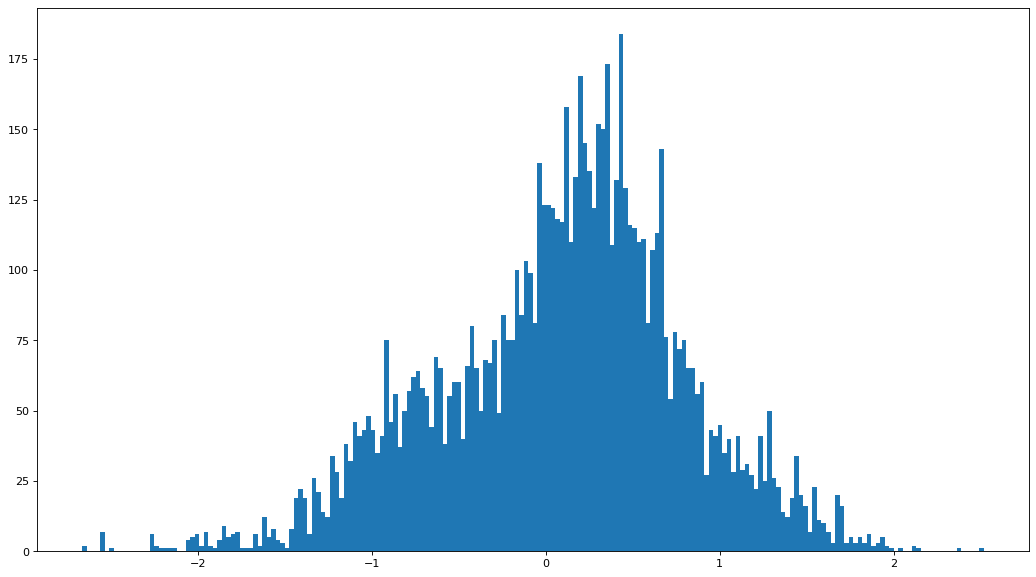

In [12]:
# import matplotlib.pyplot as plt
import matplotlib.pyplot as plt   
from matplotlib.pyplot import *
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

figure(figsize=(16, 9), dpi=80)
n_bins = 200
x = states[BURN_IN_PERIOD:]

plt.hist(x, bins=n_bins)
plt.show() 

In [48]:
# Question 3 - Incomplete
def Geo(p = 0.4):
    return np.random.geometric(p)

def Poi(_lambda = 5):
    return np.random.poisson(_lambda)

def proposed_state(u, p = 0.4):
    return math.ceil(np.log(u) / np.log(1-p))


def acceptance_probability(proposed_state, state):
    return min( 1, ( (5**proposed_state * 0.6**(proposed_state-1) * math.factorial(proposed_state )) / (5**state * 0.6**(state-1) * math.factorial(state))))

                    
# state = 5
# u = np.random.uniform(0,1)
# z_p = proposed_state(u)
# z_p = Poi()
# z_j = state   
               
# acceptance_probability(z_p, z_j)            

state = 5
states = []
N = 10000
BURN_IN_PERIOD = 2000

def accept_reject_3(j, state):

    proposed_state = Geo() - 1
#     print(proposed_state)
    
#     acceptance_probability = min(1, (Y(proposed_state) / Y(state)))
#     acceptance_probability = (Geo( state ) - 1) / Poi( state )
    z_p = acceptance_probability(proposed_state, state)
    
    accaptance = np.random.uniform(0,1)
    
#     print(f"x_{j} = state: {state} | proposed_state: {proposed_state} | aceptance_probability: {acceptance_probability} | accept: {acceptance_probability > accaptance} ")

    if z_p > accaptance:
        state = proposed_state
    return state

for j in range(N):
#     states.append(Geo())
    state = accept_reject_3(j, state)
    states.append(state)

# Geo()
# Poi()
mean(states[BURN_IN_PERIOD:])
# states

14.06825

In [ ]:
Poi(0)

In [ ]:
# i)
simulated_expecation = mean(states[BURN_IN_PERIOD:])
theoretical_expectation = 1 / 0.4
print(f"simulated_expecation: {simulated_expecation} | theoretical_expectation: {theoretical_expectation} | error: {simulated_expecation - theoretical_expectation}")


In [ ]:
# ii)
simulated_variance = variance(states[BURN_IN_PERIOD:])
theoretical_variance = (1-0.4) / 0.4**2
print(f"simulated_variance: {simulated_variance} | theoretical_variance: {theoretical_variance} | error: {simulated_variance - theoretical_variance}")

In [ ]:
5 * 0.4

In [ ]:
Geo(0.6)

In [ ]:
np.sin(0)